<a href="https://colab.research.google.com/github/Taitilchheda/Stock-Market-Prediction/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


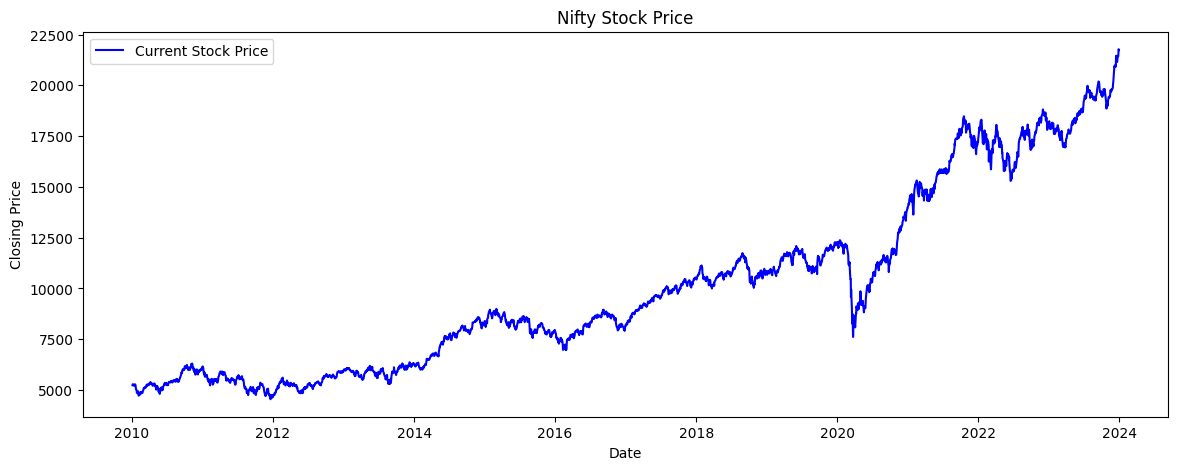

Mean Squared Error: 10621.320290153475
R-squared: 0.9994425807879455


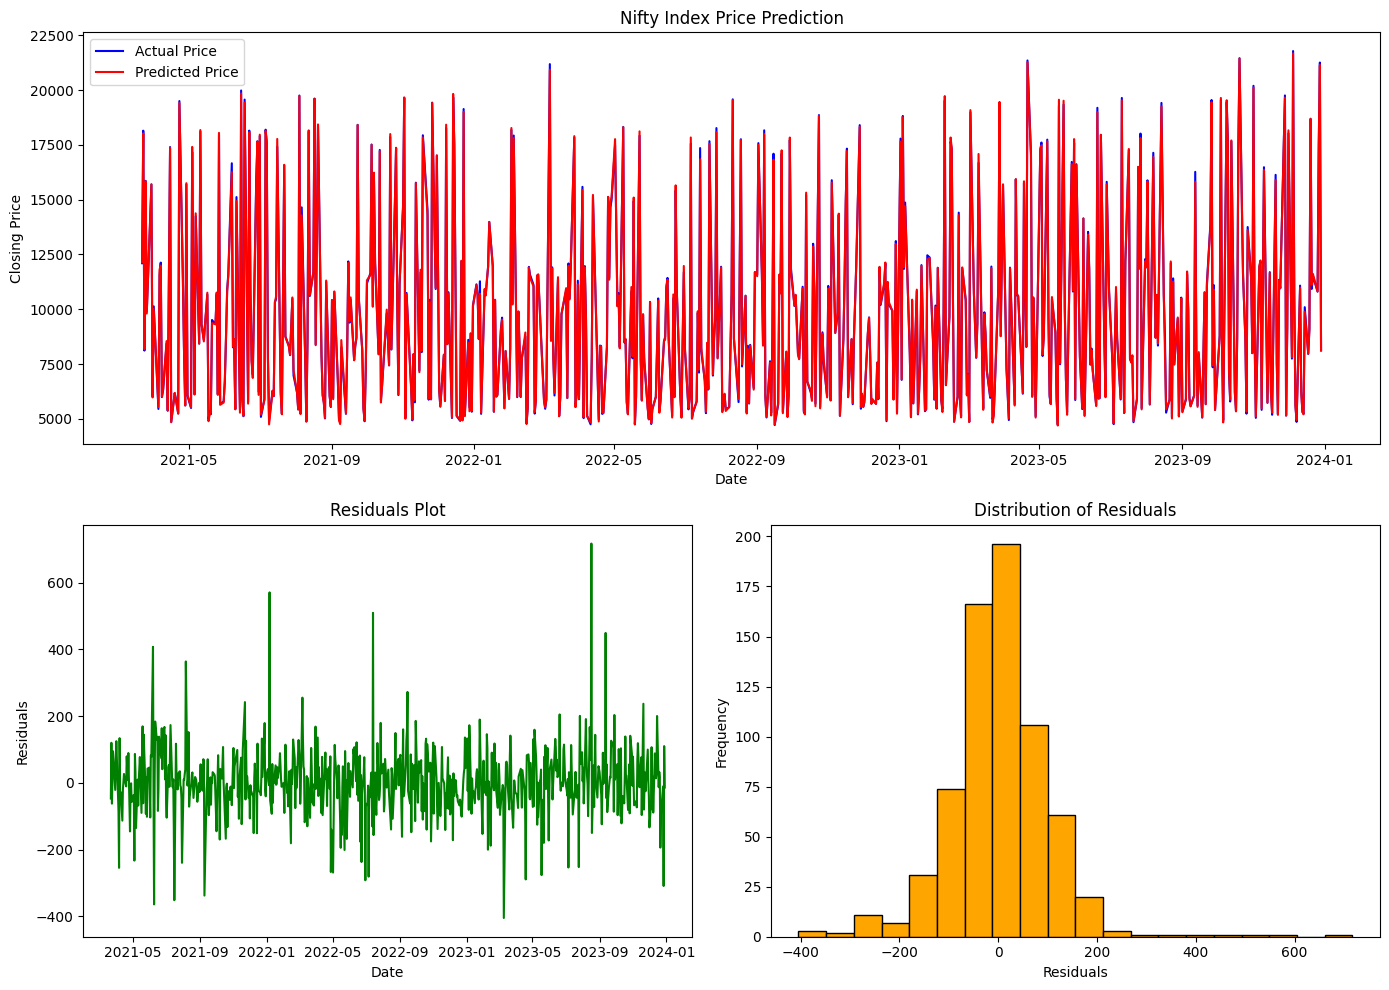

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf

# Fetching historical stock data (example: Nifty Index)
stock_data = yf.download('^NSEI', start='2010-01-01', end='2024-01-01')

# Plotting current stock price
plt.figure(figsize=(14, 5))
plt.plot(stock_data.index, stock_data['Close'], label='Current Stock Price', color='blue')
plt.title('Nifty Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

# Creating features (predictors) and target variable
stock_data['Next_Close'] = stock_data['Close'].shift(-1)  # Shift close price by one day to predict next day's close
features = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Using Open, High, Low, Close, Volume as features
target = stock_data['Next_Close'].dropna()

# Ensure the features dataset matches the length of the target dataset
features = features.iloc[:len(target)]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


plt.figure(figsize=(14, 10))

# Plotting actual vs. predicted prices
plt.subplot(2, 1, 1)
plt.plot(stock_data.index[-len(y_test):], y_test, label='Actual Price', color='blue')
plt.plot(stock_data.index[-len(y_test):], predictions, label='Predicted Price', color='red')
plt.title('Nifty Index Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Plotting residuals
residuals = y_test - predictions
plt.subplot(2, 2, 3)
plt.plot(stock_data.index[-len(y_test):], residuals, color='green')
plt.title('Residuals Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')

# Plotting distribution of residuals
plt.subplot(2, 2, 4)
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
